<h1 style="text-align: center;">Implementation of CNN and Deep Learning for Image Retrieval on Animal Dataset</h1>
<h3>Author: Johan Winarwan Nawawi | 3322600023 | 3 STr SDT A</h3>

## Import Required Libraries

In [28]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import numpy as np

import warnings
warnings.filterwarnings('ignore')


## Read Animal Dataset

In [29]:
base_dir = "Data/animal_dataset/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

folders = os.listdir(train_dir)
print(folders)


['bird', 'butterfly', 'elephant', 'swan', 'tiger']


### Image Data Generator

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 50),
    batch_size=1)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 50),
    batch_size=1)

Found 20 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


## Deep Learning Model

In [31]:
img_input = layers.Input(shape=(100, 50, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(50, activation='sigmoid')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])

## Fit Geneartor

In [32]:
history = model.fit(
    train_generator,
    # steps_per_epoch=20,
    epochs=1000,
    validation_data=validation_generator,
    # validation_steps=10,
    verbose=1)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1702 - loss: 0.1663 - val_acc: 0.2000 - val_loss: 0.1616
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2814 - loss: 0.1602 - val_acc: 0.2000 - val_loss: 0.1614
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2578 - loss: 0.1608 - val_acc: 0.2000 - val_loss: 0.1612
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3439 - loss: 0.1596 - val_acc: 0.2000 - val_loss: 0.1610
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.0806 - loss: 0.1648 - val_acc: 0.2000 - val_loss: 0.1608
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2353 - loss: 0.1589 - val_acc: 0.2000 - val_loss: 0.1606
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2843 - loss: 0.1559 - val_acc: 0.2000 - val_loss: 0.1604
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.2538 - loss: 0.1595 - val_acc: 0.2000 - val_loss: 0.1603
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

## Plot Accuracy and Loss

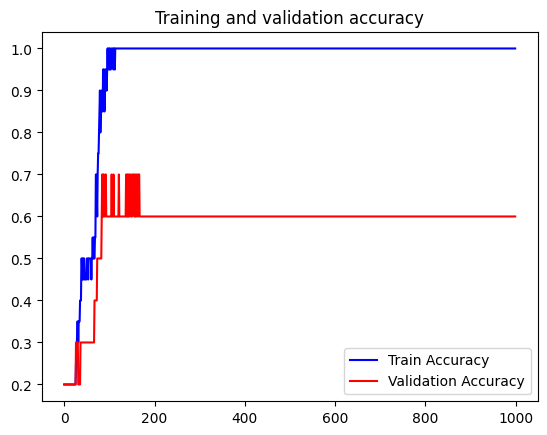

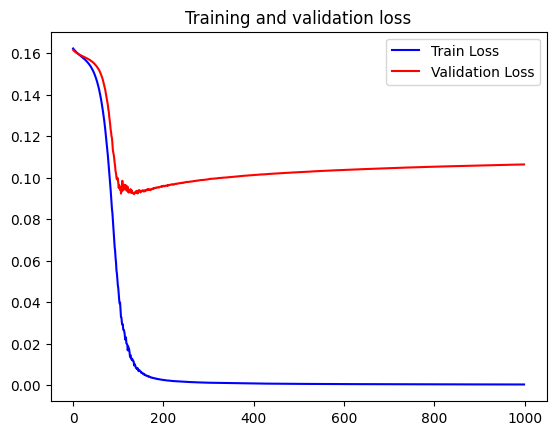

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

## Testing Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
output unit values:
 [[0.0061421  0.00356154 0.00231751 0.979114   0.00886487]]


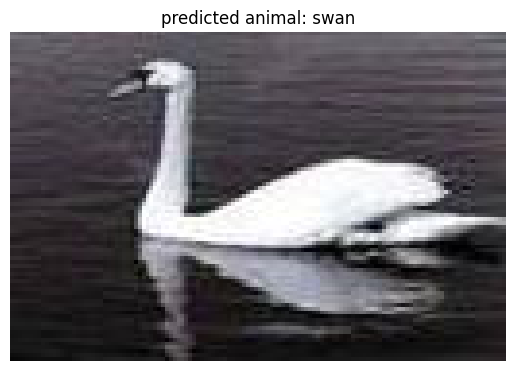

In [34]:
# Load the image with the correct parameters
img = load_img(test_dir + '/data4.jpg', target_size=(100, 50))  # No 'False' argument
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict the class
preds = model.predict(x)
print("output unit values:\n", preds)
index_preds = np.argmax(preds)

# Get the predicted index
plt.imshow(load_img(test_dir + '/data4.jpg'))
plt.axis('off')
plt.title(f'predicted animal: {folders[index_preds]}')
plt.show()

## Model 2 with Modified Parameters

In [35]:
# input layer
img_input = layers.Input(shape=(100, 50, 3))

# first convolutional block
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# second convolutional block
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# flatten layer
x = layers.Flatten()(x)

# fully connected layer
x = layers.Dense(20, activation='sigmoid')(x)


# output layer
output = layers.Dense(5, activation='softmax')(x)

# build the model
model = Model(img_input, output)

model.compile(optimizer=Adam(learning_rate=0.001),
            loss='mean_squared_error',
            metrics=['acc'])

# train the model
history = model.fit(
    train_generator,
    # step_per_epoch=20
    epochs=1000,
    validation_data=validation_generator,
    # validation_steps=10
    verbose=1)


Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - acc: 0.3344 - loss: 0.1719 - val_acc: 0.6000 - val_loss: 0.1551
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5873 - loss: 0.1515 - val_acc: 0.6000 - val_loss: 0.1470
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8060 - loss: 0.1342 - val_acc: 0.9000 - val_loss: 0.1227
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8161 - loss: 0.1145 - val_acc: 0.7000 - val_loss: 0.1082
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9136 - loss: 0.0689 - val_acc: 0.6000 - val_loss: 0.1030
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0454 - val_acc: 0.8000 - val_loss: 0.0891
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0294 - val_acc: 0.7000 - val_loss: 0.0761
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0311 - val_acc: 0.7000 - val_loss: 0.0704
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - a

## Plot Accuracy and Loss

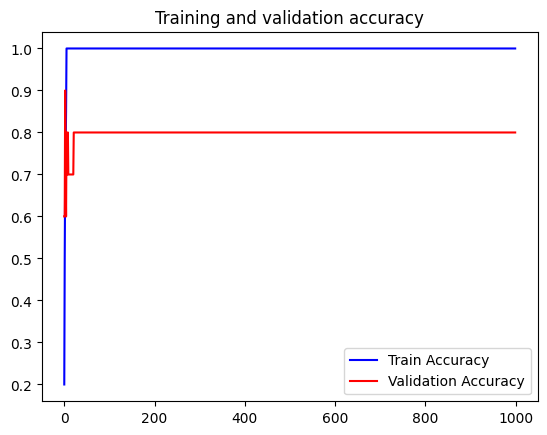

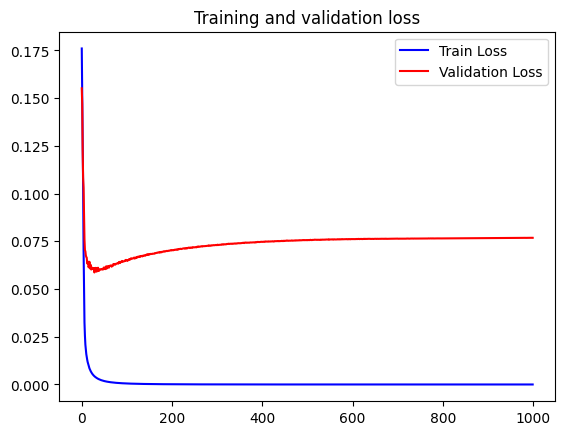

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

## Testing Model 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
output unit values:
 [[9.8090561e-05 7.0169917e-05 1.5752364e-04 9.9963820e-01 3.5980102e-05]]


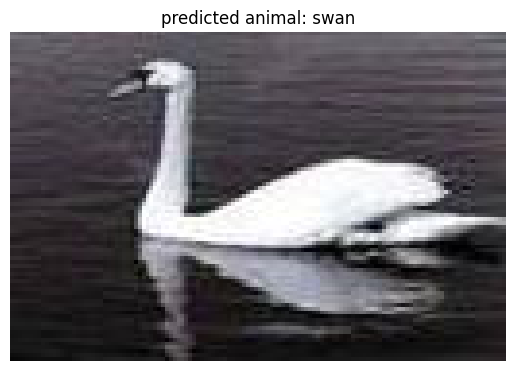

In [37]:
# Load the image with the correct parameters
img = load_img(test_dir + '/data4.jpg', target_size=(100, 50))  # No 'False' argument
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict the class
preds = model.predict(x)
print("output unit values:\n", preds)
index_preds = np.argmax(preds)

# Get the predicted index
plt.imshow(load_img(test_dir + '/data4.jpg'))
plt.axis('off')
plt.title(f'predicted animal: {folders[index_preds]}')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
output unit values for data1.jpg:
 [[9.9957985e-01 1.2982535e-04 2.8028358e-05 1.1548954e-04 1.4676528e-04]]


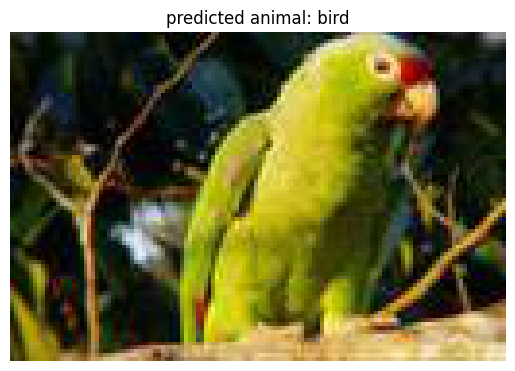

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
output unit values for data2.jpg:
 [[1.0477454e-04 9.9966478e-01 9.9504199e-05 5.2704101e-05 7.8289231e-05]]


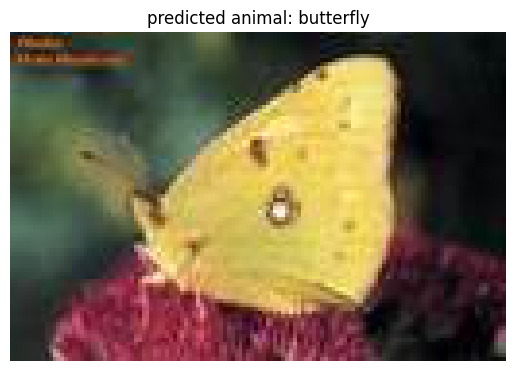

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
output unit values for data3.jpg:
 [[4.7852504e-06 1.0586306e-04 9.9966443e-01 1.6104028e-04 6.3818676e-05]]


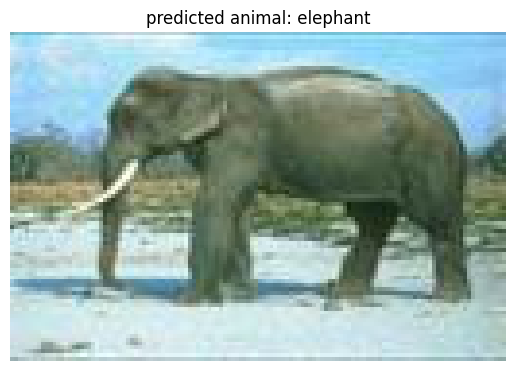

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
output unit values for data4.jpg:
 [[9.8090561e-05 7.0169917e-05 1.5752364e-04 9.9963820e-01 3.5980102e-05]]


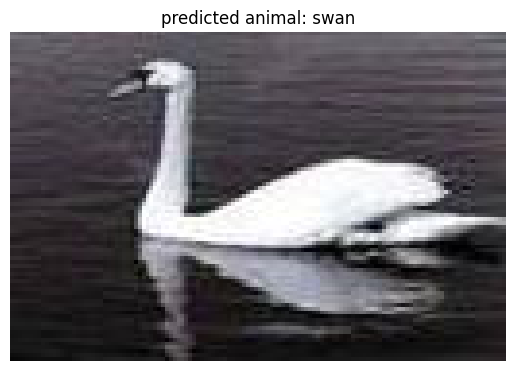

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
output unit values for data5.jpg:
 [[3.78195109e-04 1.08296886e-01 2.20488831e-01 5.02086405e-05
  6.70785844e-01]]


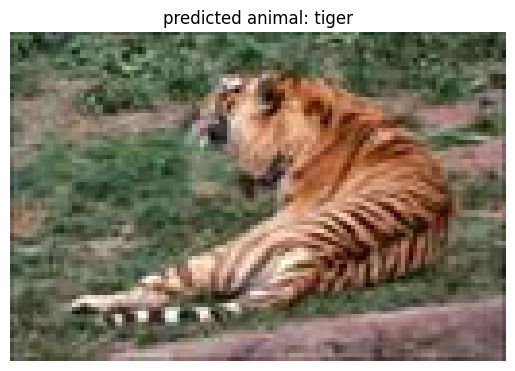

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
output unit values for data6.jpg:
 [[9.9957985e-01 1.2982535e-04 2.8028358e-05 1.1548954e-04 1.4676528e-04]]


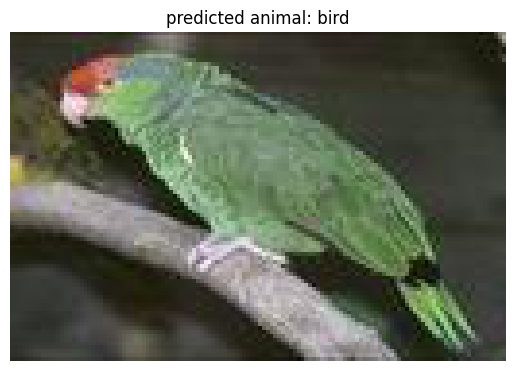

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
output unit values for data7.jpg:
 [[1.0477454e-04 9.9966478e-01 9.9504199e-05 5.2704101e-05 7.8289231e-05]]


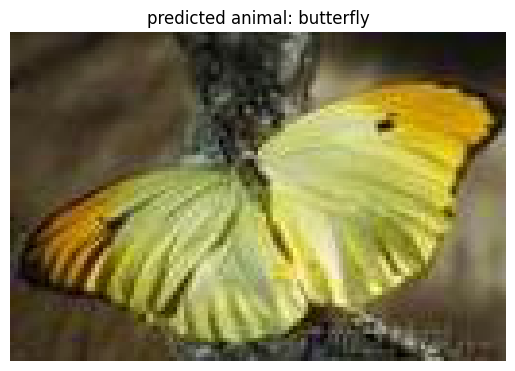

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
output unit values for data8.jpg:
 [[4.7852504e-06 1.0586306e-04 9.9966443e-01 1.6104028e-04 6.3818676e-05]]


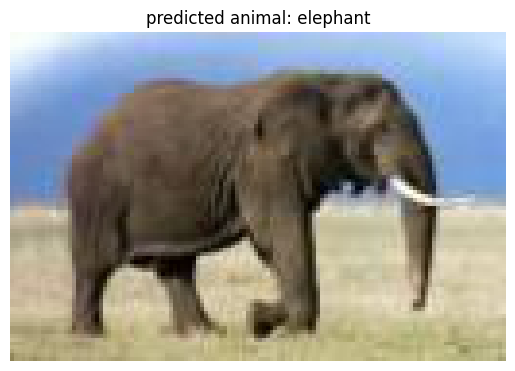

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
output unit values for data9.jpg:
 [[9.8090561e-05 7.0169917e-05 1.5752364e-04 9.9963820e-01 3.5980102e-05]]


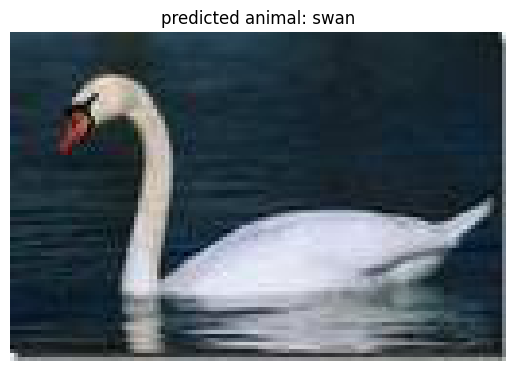

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
output unit values for data10.jpg:
 [[1.5291973e-04 8.9753659e-05 8.9766836e-05 2.8562561e-05 9.9963903e-01]]


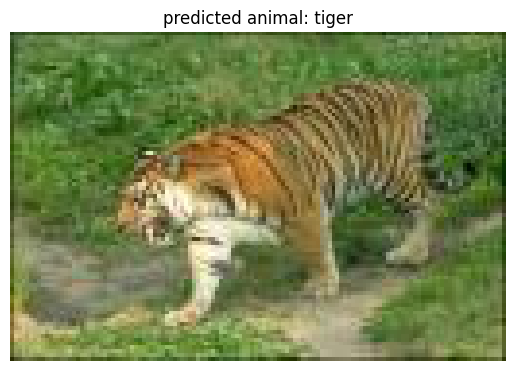

In [38]:
for i in range(1, 11):
    img_path = f"{test_dir}/data{i}.jpg"
    img = load_img(img_path, target_size=(100, 50))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    print(f"output unit values for data{i}.jpg:\n", preds)
    index_preds = np.argmax(preds)

    plt.imshow(load_img(img_path))
    plt.axis('off')
    plt.title(f"predicted animal: {folders[index_preds]}")
    plt.show()